# 1. Setup Environment

1.1 Install

In [ ]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install python-crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install attacut

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ตัดคำจากประโยคในภาษาไทย ให้เป็น token เพื่อให้เครื่องง่ายต่อการประมวลผลต่อไป

import pythainlp
import attacut
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
import re

In [ ]:
# import library ต่างๆ จาก scikitlearn

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

1.2 Download Dataset

In [ ]:
# train set
!gdown --id 1DxBuSj2YZN_rdRBk5ZGefioB8CN1aqhk

# dev set
!gdown --id 1z1humh123OJO2YUiJQ3A2Ww97f5n8P3F

# test set
!gdown --id 1rBxajNnPSszytIr3fL6CVERkdVmjosgm

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1DxBuSj2YZN_rdRBk5ZGefioB8CN1aqhk
To: /content/NLP3_Final_Project-Train_Set.csv
100% 71.9k/71.9k [00:00<00:00, 56.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1z1humh123OJO2YUiJQ3A2Ww97f5n8P3F
To: /content/NLP3_Final_Project-Dev_Set.csv
100% 9.80k/9.80k [00:00<00:00, 11.2MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category

In [ ]:
# import ไฟล์ .csv เข้ามา (ยังไม่มีการตัดคำใดๆ)
# ใช้คำสั่ง pd.read_csv("_____.csv") เพื่ออ่านไฟล์

import pandas as pd
# import data
train = pd.read_csv('NLP3_Final_Project-Train_Set.csv', encoding='utf-8')
dev = pd.read_csv('NLP3_Final_Project-Dev_Set.csv', encoding='utf-8')
test = pd.read_csv('NLP3_Final_Project-Test_Set.csv', encoding='utf-8')

In [ ]:
train   # train_set มีทั้งหมด 240 rows

,id,question,answer,label
0,1,น้องนิกอย่าเพิ่งทำอะไรวู่วามนะ เดี๋ยวพี่ทำธุระ...,แม่จะกลับมาจากต่างประเทศสิ้นปีนี้,0
1,2,แฟนหนูไปอยู่กับคนใหม่ หนูควรจะทำยังไงดีคะ ไปแย...,ควรล้างทำความสะอาดเมล็ดทานตะวัน และแช่น้ำทิ้งไ...,0
2,3,ฉันควรจะขอโทษเขาดีมั้ยนะ ตอนนี้เขาก็มาให้ฉันขอ...,ต้นทานตะวันอ่อนนั้นมีวิตามิน ธาตุเหล็ก และโปรต...,0
3,4,ฉันไม่อยากคู่กับไอซ์เลยสักนิด เรามาเปลี่ยนคู่ก...,การเพาะเมล็ดดอกทานตะวันนั้นไม่ได้ยุ่งยาก ไม่ซั...,0
4,5,ขอนัดเป็นวันอังคารนี้ตอนสองทุ่มที่สตูดิโอได้มั...,เมล็ดทานตะวันมีโปรตีนค่อนข้างสูง และยังมีธาตุเ...,0
...,...,...,...,...
235,236,นายคิดว่านายจะเปลี่ยนใจไปรักน้องสาวรุ้งได้มั้ย,เวลาเราได้รักใครสักคนแล้ว มันก็ยากที่จะถอนตัวแ...,2
236,237,นี่เอ็งมีเงินเก็บซักก้อนมั้ยวะ,แค่ค่าห้องเดือนนี้ยังไม่มีปัญญาไปหามาจ่ายเลย จ...,2
237,238,แถวนี้มีร้านอาหารอะไร ๆ อร่อย ๆ แนะนำบ้างมั้ย,แถวนี้เหรอ ไม่ต้องไปหาร้านอาหารเลย กลับไปกินที...,2
238,239,เขียนอะไรอยู่เหรอ การบ้านหรือเรียงความล่ะ พี่ช...,แค่เขียนอะไรเล่น ๆ เรื่อยเปื่อยน่ะ ไม่มีสาระสำ...,2


In [ ]:
dev   # dev_set มีทั้งหมด 30 rows

,id,question,answer,label
0,241,คุณไม่เข้าเรียนไปสองครั้งแล้ว คิดว่ายังจะเรียน...,ตอนนี้แถวมหาวิทยาลัยมีรถขับไปมาเยอะแยะ ไม่เปลี...,0
1,242,บ้านรกขนาดนี้ ไม่มีเวลาทำความสะอาดเลยเหรอ,บางทีถ้าเจอมารินฉันอาจจะกลับประเทศไทยได้ ไม่ต้...,0
2,243,เธอทำกับข้าวกินเองทุกวันเลยเหรอ,อย่าอวดเก่งน่า ผมจะไปส่งคุณขึ้นรถกลับบ้าน,0
3,244,เธอไม่รู้เลยเหรอว่าสองคนนี้เป็นพี่น้องกัน,ไม่เปลี่ยวหรอก พ่อไม่ต้องห่วงนะคะ หนูกลับเองได้,0
4,245,โรงอาหารไปทางไหนครับ,หน้าฝนก็ต้องกลับบ้านแหละ เพราะของขายยาก,0
5,246,ทำงานหาเงินคนเดียวตลอดแบบนี้ ไม่เหนื่อยบ้างเหรอ,ไม่เป็นไรค่ะ เดี๋ยวหนูกลับเอง พ่อไม่ต้องห่วงนะคะ,0
6,247,ไม่เคยเห็นใครมาจ่ายค่าห้องนอกจากคุณเลย คุณพักอ...,ทุกทิศมีรถยนต์ขวักไขว่ แต่กลับไม่เห็นรถประจำทา...,0
7,248,เสียเงินส่วนตัวไปกับเรื่องกินเยอะมั้ย,เขาไม่รู้จักทาง ถ้าไปคนเดียวก็คงหลงวนเวียนอยู่...,0
8,249,พ่อไม่กลับบ้านอีกแล้วเหรอวันนี้,หนุ่มสาวเดินจูงมือคลอเคลีย ลืมความเหน็ดเหนื่อย...,0
9,250,แม่เข้านอนไปแล้วยัง,เขาเรียกลัทธิคอมมิวนิสต์ว่าลัทธิที่เกิดจากความ...,0


In [ ]:
test   # test_set มีทั้งหมด 30 rows

,id,question,answer,label
0,271,เธอกับแฟนยังรักกันดีหรือเปล่า,เราเหลือเวลาไม่มาก พ่อจะเช็คตารางเพื่อหาเที่ยว...,0
1,272,เธอคิดว่านิยายเรื่องนี้สนุกไหม,ผัดผักไม่กิน แต่กลับอยากกินผัดผักบุ้งฝีมือแม่ท...,0
2,273,คืนนี้คุณโทรหาผมได้หรือเปล่า,ให้ตายเถอะ เธอทนลูกอ้อนของยัยคนนี้ไม่ได้จริง ๆ,0
3,274,เราไปคอนเสิร์ตของน้าแอ๊ดกันไหม,ฉันสืบประวัติของเขามาหมดแล้วก่อนที่จะกลับมา,0
4,275,ไปอยู่อังกฤษตั้งนาน เธอคิดถึงบ้านบ้างหรือเปล่า,ฉันทำสัญญาแทนนายเรียบร้อยแล้ว,0
5,276,ต้องให้ผมพิสูจน์อีกแค่ไหน คุณถึงจะคิดว่าผมไม่ใ...,ตั้งแต่ตอนนี้เป็นต้นไป คนที่ฉันจะเดินไปส่งที่บ...,0
6,277,ถ้าเป็นไปได้ เธออยากจะขอลายเซ็นดาราคนนั้นอยู่ไหม,ไม่ทันแล้ว มันล้างเลือดของข้าออกหมดแล้ว,0
7,278,เราออกจากฝั่งมาไกลมากแล้ว ว่ายกลับเข้าฝั่งกันเถอะ,ยายเดินกลับมาบ้านแล้ว เสียงก๊อกแก๊ก ๆ อยู่ในคร...,0
8,279,เธอจะถ่ายรูปอยู่ตรงนี้ทั้งวัน ไม่ไปที่อื่นแล้ว...,ครั้งสุดท้ายคุณนายติดตามสามีขึ้นไปรับราชการอยู...,0
9,280,เธอคิดว่าข้อสอบปลายภาควิชานี้ยากไหม,เมื่อหลายชั่วโมงก่อนมันกลับไปที่โบสถ์ แต่ตอนนี...,0


# 2. Preprocessing

In [ ]:
def tokenize_with_no_stopwords(text):
  list_word = pythainlp.word_tokenize(text, engine='attacut')
  stopwords = ['สิ', 'นะ', 'ละ', 'ล่ะ', 'เถอะ', 'โห', 'โห่', 'โถ่', 'โธ่', 'ค่ะ', 'คะ', 'ครับ', 'นะ', 'น่ะ', 'เอง', 'โว้ย', 'แล้ว', 'ก็ได้', ' ', 'ๆ', 'เนี่ย', 'ก็', 'เอ้ย', 'จะ', 'วะ', 'ว่ะ', 'นา', 'เอ๊ย', 'เอ๋ย', 'ปัดโธ่', 'ปัดโถ่', 'เดี๋ยว']
  list_word_not_stopwords = [i for i in list_word if i not in stopwords]
  return ','.join(list_word_not_stopwords)

In [ ]:
# ทดลองใช้ฟังก์ชั่น

tokenize_with_no_stopwords("วันนี้อากาศดีจัง ไปเที่ยวกันเถอะ")

'วัน,นี้,อากาศ,ดี,จัง,ไป,เที่ยว,กัน'

In [ ]:
# จาก df ที่มี สร้างคอลัมน์ใหม่ที่เก็บตัดคำแล้ว tokenized_text และ drop คอลัมน์เดิม

train['cleaned_question'] = train['question'].apply(tokenize_with_no_stopwords)
dev['cleaned_question'] = dev['question'].apply(tokenize_with_no_stopwords)
test['cleaned_question'] = test['question'].apply(tokenize_with_no_stopwords)

train['cleaned_answer'] = train['answer'].apply(tokenize_with_no_stopwords)
dev['cleaned_answer'] = dev['answer'].apply(tokenize_with_no_stopwords)
test['cleaned_answer'] = test['answer'].apply(tokenize_with_no_stopwords)

In [ ]:
# ตั้งชื่อ df ใหม่ ที่ drop คอลัมน์ออกไปแล้ว

train = train.drop(columns='question')
dev = dev.drop(columns='question')
test = test.drop(columns='question')

train = train.drop(columns='answer')
dev = dev.drop(columns='answer')
test = test.drop(columns='answer')

In [ ]:
# อยากได้เป็น list ให้รันอันนี้

train["pair_sentence"] = train[["cleaned_question", "cleaned_answer"]].values.tolist()
dev["pair_sentence"] = dev[["cleaned_question", "cleaned_answer"]].values.tolist()
test["pair_sentence"] = test[["cleaned_question", "cleaned_answer"]].values.tolist()

In [ ]:
# รวมคำทั้ง question และ answer เข้า BoW

train['bow'] = train[['cleaned_question', 'cleaned_answer']].agg(','.join, axis=1)
dev['bow'] = dev[['cleaned_question', 'cleaned_answer']].agg(','.join, axis=1)
test['bow'] = test[['cleaned_question', 'cleaned_answer']].agg(','.join, axis=1)

In [ ]:
# เรียงลำดับ column ใหม่

new_train = train[['id','cleaned_question','cleaned_answer','bow','pair_sentence','label']]
new_dev = dev[['id','cleaned_question','cleaned_answer','bow','pair_sentence','label']]
new_test = test[['id','cleaned_question','cleaned_answer','bow','pair_sentence','label']]

In [ ]:
new_train

,id,cleaned_question,cleaned_answer,bow,pair_sentence,label
0,1,"น้องนิก,อย่า,เพิ่ง,ทำ,อะไร,วู่วาม,พี่,ทำ,ธุระ,...","แม่,กลับ,มา,จาก,ต่าง,ประเทศ,สิ้น,ปี,นี้","น้องนิก,อย่า,เพิ่ง,ทำ,อะไร,วู่วาม,พี่,ทำ,ธุระ,...","[น้องนิก,อย่า,เพิ่ง,ทำ,อะไร,วู่วาม,พี่,ทำ,ธุระ...",0
1,2,"แฟน,หนู,ไป,อยู่,กับ,คน,ใหม่,หนู,ควร,ทำ,ยัง,ไง,...","ควร,ล้าง,ทำ,ความ,สะอาด,เมล็ด,ทานตะวัน,และ,แช่,...","แฟน,หนู,ไป,อยู่,กับ,คน,ใหม่,หนู,ควร,ทำ,ยัง,ไง,...","[แฟน,หนู,ไป,อยู่,กับ,คน,ใหม่,หนู,ควร,ทำ,ยัง,ไง...",0
2,3,"ฉัน,ควร,ขอโทษ,เขา,ดี,มั้ย,ตอน,นี้,เขา,มา,ให้,ฉ...","ต้น,ทาน,ตะวัน,อ่อน,นั้น,มี,วิตามิน,ธาตุ,เหล็ก,...","ฉัน,ควร,ขอโทษ,เขา,ดี,มั้ย,ตอน,นี้,เขา,มา,ให้,ฉ...","[ฉัน,ควร,ขอโทษ,เขา,ดี,มั้ย,ตอน,นี้,เขา,มา,ให้,...",0
3,4,"ฉัน,ไม่,อยาก,คู่,กับ,ไอซ์,เลย,สัก,นิด,เรา,มา,เ...","การ,เพาะ,เมล็ด,ดอก,ทานตะวัน,นั้น,ไม่,ได้,ยุ่งย...","ฉัน,ไม่,อยาก,คู่,กับ,ไอซ์,เลย,สัก,นิด,เรา,มา,เ...","[ฉัน,ไม่,อยาก,คู่,กับ,ไอซ์,เลย,สัก,นิด,เรา,มา,...",0
4,5,"ขอ,นัด,เป็น,วัน,อังคาร,นี้,ตอน,สอง,ทุ่ม,ที่,สต...","เมล็ด,ทานตะวัน,มี,โปรตีน,ค่อนข้าง,สูง,และ,ยัง,...","ขอ,นัด,เป็น,วัน,อังคาร,นี้,ตอน,สอง,ทุ่ม,ที่,สต...","[ขอ,นัด,เป็น,วัน,อังคาร,นี้,ตอน,สอง,ทุ่ม,ที่,ส...",0
...,...,...,...,...,...,...
235,236,"นาย,คิด,ว่า,นาย,เปลี่ยนใจ,ไป,รัก,น้อง,สาว,รุ้ง...","เวลา,เรา,ได้,รัก,ใคร,สัก,คน,มัน,ยาก,ที่,ถอน,ตัว","นาย,คิด,ว่า,นาย,เปลี่ยนใจ,ไป,รัก,น้อง,สาว,รุ้ง...","[นาย,คิด,ว่า,นาย,เปลี่ยนใจ,ไป,รัก,น้อง,สาว,รุ้...",2
236,237,"นี่,เอ็ง,มี,เงิน,เก็บ,ซัก,ก้อน,มั้ย","แค่,ค่า,ห้อง,เดือน,นี้,ยัง,ไม่,มี,ปัญญา,ไป,หา,...","นี่,เอ็ง,มี,เงิน,เก็บ,ซัก,ก้อน,มั้ย,แค่,ค่า,ห้...","[นี่,เอ็ง,มี,เงิน,เก็บ,ซัก,ก้อน,มั้ย, แค่,ค่า,...",2
237,238,"แถว,นี้,มี,ร้าน,อาหาร,อะไร,อร่อย,แนะนำ,บ้าง,มั้ย","แถว,นี้,เหรอ,ไม่,ต้อง,ไป,หา,ร้าน,อาหาร,เลย,กลั...","แถว,นี้,มี,ร้าน,อาหาร,อะไร,อร่อย,แนะนำ,บ้าง,มั...","[แถว,นี้,มี,ร้าน,อาหาร,อะไร,อร่อย,แนะนำ,บ้าง,ม...",2
238,239,"เขียน,อะไร,อยู่,เหรอ,การ,บ้าน,หรือ,เรียง,ความ,...","แค่,เขียน,อะไร,เล่น,เรื่อยเปื่อย,ไม่,มี,สาระ,ส...","เขียน,อะไร,อยู่,เหรอ,การ,บ้าน,หรือ,เรียง,ความ,...","[เขียน,อะไร,อยู่,เหรอ,การ,บ้าน,หรือ,เรียง,ความ...",2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


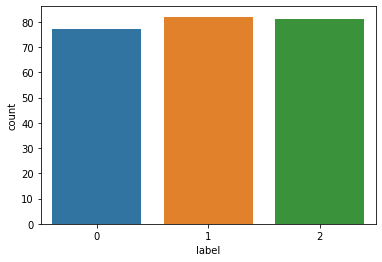

In [ ]:
# กราฟแสดงจำนวน label ทั้งสาม คือ YES, NO, NEUTRAL

from matplotlib import pyplot as plt
import seaborn as sns

sns.countplot(new_train.label)

# 3. Training with Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
veczr = CountVectorizer(ngram_range=(2, 2), max_features=800000)

In [ ]:
train_ngram_doc = veczr.fit_transform(new_train['bow'])

In [ ]:
train_ngram_doc

<240x3258 sparse matrix of type '<class 'numpy.int64'>'
	with 4246 stored elements in Compressed Sparse Row format>

In [ ]:
words = veczr.get_feature_names_out()
len(words)

3258

In [ ]:
from itertools import *

len(veczr.vocabulary_), list(islice(veczr.vocabulary_.items(), 20)), list(islice(veczr.vocabulary_.items(), 2600, 2620))

(3258,
 [('องน อย', 1576),
  ('อย เพ', 1667),
  ('เพ ทำ', 2274),
  ('ทำ อะไร', 613),
  ('อะไร วาม', 1725),
  ('วาม ทำ', 1246),
  ('ทำ ระ', 608),
  ('ระ เสร', 1134),
  ('เสร แวะ', 2462),
  ('แวะ ไป', 2694),
  ('ไป วย', 3056),
  ('วย ตกลง', 1198),
  ('ตกลง แม', 483),
  ('แม กล', 2642),
  ('กล มา', 27),
  ('มา จาก', 929),
  ('จาก าง', 379),
  ('าง ประเทศ', 1793),
  ('แฟน หน', 2639),
  ('หน ไป', 1400)],
 [('ไม ไม', 3182),
  ('ไม จา', 3132),
  ('จา มา', 369),
  ('มา คร', 926),
  ('คร เย', 224),
  ('เย เขา', 2332),
  ('ปกต เช', 748),
  ('ตอน สาย', 511),
  ('สาย มาก', 1340),
  ('มาก ผม', 987),
  ('ผม เรา', 817),
  ('เลย รอ', 2415),
  ('รอ เพ', 1126),
  ('คน อน', 197),
  ('อน ตอน', 1589),
  ('ตอน มา', 509),
  ('ไม ครบ', 3127),
  ('นาน กว', 687),
  ('กว อาการ', 43),
  ('อาการ างเค', 1745)])

In [ ]:
vocab = veczr.get_feature_names_out()
len(vocab)

3258

In [ ]:
val_ngram_doc = veczr.transform(new_dev['bow'])
val_ngram_doc

<30x3258 sparse matrix of type '<class 'numpy.int64'>'
	with 213 stored elements in Compressed Sparse Row format>

In [ ]:
vocab[1100:1150]

array(['ยาง ผม', 'ยาย นาย', 'ยาย ผม', 'ยาว คล', 'ยาวเหย ยด', 'รณ วย',
       'รด พรวน', 'รถ จอด', 'รถ พา', 'รถ มา', 'รถ หน', 'รถ เข', 'รถ เด',
       'รถ เป', 'รถ แล', 'รถ ให', 'รถ ไป', 'รบ ได', 'รบกวน ขอ',
       'รบกวน าน', 'รภ ไว', 'รวม หม', 'รวม เห', 'รวย แบบ', 'รสชาต พอก',
       'รสชาต เหม', 'รอ เพ', 'รอ แค', 'รอ แป', 'รองเท ให', 'รอด เลย',
       'รอด ไป', 'รอบ เร', 'ระ าง', 'ระ เสร', 'ระ ไม', 'ระด เธอ',
       'ระบบ การ', 'ระบบ ของ', 'ระบบ เบรก', 'ระบาย ของ', 'ระบาย ออก',
       'ระบาย ได', 'ระพ นธ', 'ระว าง', 'ระหง วง', 'ระหว าง', 'ระเห ระหง',
       'ราคา อย', 'ราคา าว'], dtype=object)

In [ ]:
m = LogisticRegression(C=0.1, dual=True, solver='liblinear', max_iter=10000)
m.fit(train_ngram_doc, new_train['label'])

dev_feature_vectors = veczr.transform(new_dev['bow'])
dev_predictions = m.predict(dev_feature_vectors)
print (classification_report(dev_predictions, new_dev['label']))

              precision    recall  f1-score   support

           0       0.20      0.50      0.29         4
           1       0.30      0.25      0.27        12
           2       0.60      0.43      0.50        14

    accuracy                           0.37        30
   macro avg       0.37      0.39      0.35        30
weighted avg       0.43      0.37      0.38        30



In [ ]:
# Test evaluation

test_feature_vectors = veczr.transform(new_test['bow'])
test_predictions = m.predict(test_feature_vectors)
print (classification_report(test_predictions, new_test['label']))

              precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.60      0.60      0.60        10
           2       0.50      0.38      0.43        13

    accuracy                           0.53        30
   macro avg       0.53      0.57      0.54        30
weighted avg       0.53      0.53      0.53        30

